

# **Representações de Histograma**

#### **Nesta aula, iremos aprender:**
1. Ver as representações do histograma RGB de imagens
2. Utilizar o algoritmo K-Means para agrupar cores dominantes e suas proporções nas imagens.


**O QUE SÃO HISTOGRAMAS DE CORES**

Um histograma é uma representação gráfica da distribuição das intensidades de pixels em uma imagem, independentemente de ser uma imagem colorida ou em escala de cinza. Visualmente, o histograma fornece uma intuição de alto nível sobre como essas intensidades (valores dos pixels) estão distribuídas na imagem. Neste contexto, assumiremos que estamos trabalhando com um espaço de cores RGB, onde os valores dos pixels variam de 0 a 255.

Ao criar um histograma, usamos o eixo X para representar nossos “blocos” ou “intervalos”. Se construirmos um histograma com 256 blocos, estaremos contando quantas vezes cada valor de pixel ocorre em toda a imagem. Por outro lado, se utilizarmos apenas 2 blocos (espaçados igualmente), estaremos contando quantas vezes um pixel está na faixa [0, 128) ou [128, 255]. O número de pixels agrupados em cada valor do eixo X é então representado no eixo Y.

Ao examinar o histograma de uma imagem, é possível obter uma compreensão geral sobre o contraste, brilho e distribuição de intensidades presentes na imagem. Isso pode ser útil para analisar a qualidade da imagem ou para ajustar o processamento de imagem, conforme necessário.

In [1]:
# Our Setup, Import Libaries, Create our Imshow Function and Download our Images
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function 
def imshow(title = "Image", image = None, size = 8):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()


# Download and unzip our images and Haarcascade Classifiers
!wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
!unzip -qq images.zip

'wget' is not recognized as an internal or external command,
operable program or batch file.
'unzip' is not recognized as an internal or external command,
operable program or batch file.


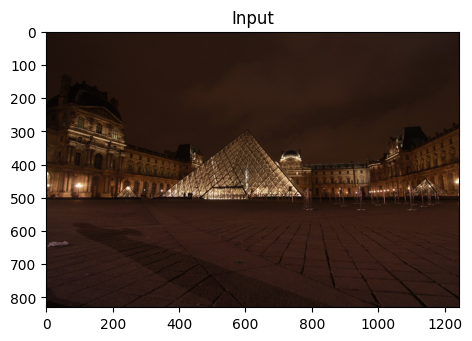

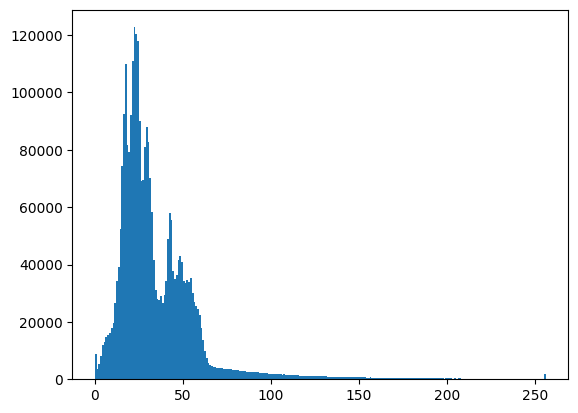

Entendendo os valores: (830, 1245, 3) forma e achatado 3100050 


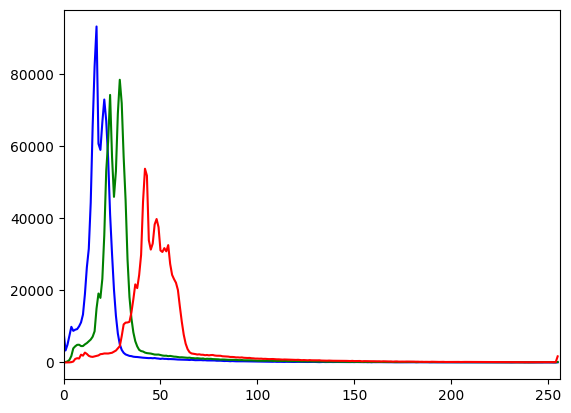

In [8]:
image = cv2.imread('images/input.jpg')
imshow("Input", image)

# Traçamos um histograma, ravel() nivela nosso array de imagens
# função .ravel() para flatterning, que pode alterar a imagem original.
# usar função .flatten() para usar cópia do dado original

"""
plt.hist recebe a imagem unidimensional, bins (intervalo para dividir os dados)
 e o range de valores (eixo x, valores de 0 a 256)
"""



plt.hist(image.ravel(), 256, [0, 256])
plt.show()

print(f"Entendendo os valores: {image.shape} forma e achatado {len(image.ravel())} ")

# Viewing Separate Color Channels
color = ('b', 'g', 'r')

# We now separate the colors and plot each in the Histogram
for i, col in enumerate(color):
    histogram2 = cv2.calcHist([image], [i], None, [256], [0, 256])
    plt.plot(histogram2, color = col)
    plt.xlim([0,256])
    
plt.show()

**cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])**

- **images** : é a imagem de origem do tipo uint8 ou float32. deve ser fornecido entre colchetes, ou seja, "[img]".

- **channels** : também é fornecido entre colchetes. É o índice do canal para o qual calculamos o histograma. Por exemplo, se a entrada for uma imagem em tons de cinza, seu valor será [0]. Para imagem colorida, você pode passar [0], [1] ou [2] para calcular o histograma do canal azul, verde ou vermelho respectivamente.

- **mask** : imagem da máscara. Para encontrar o histograma da imagem completa, é indicado como "Nenhum". Mas se você quiser encontrar o histograma de uma determinada região da imagem, terá que criar uma imagem de máscara para isso e fornecê-la como máscara. (Mostrarei um exemplo mais tarde.)

- **histSize** : isso representa nossa contagem de BIN. Precisa ser fornecido entre colchetes. Para escala completa, passamos [256].

- **ranges** : this is our RANGE. Normally, it is [0,256].

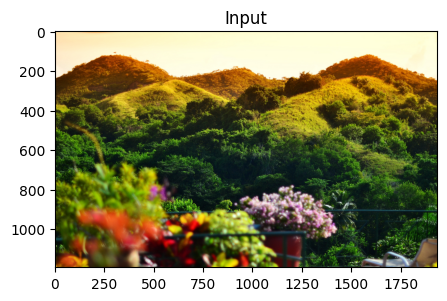

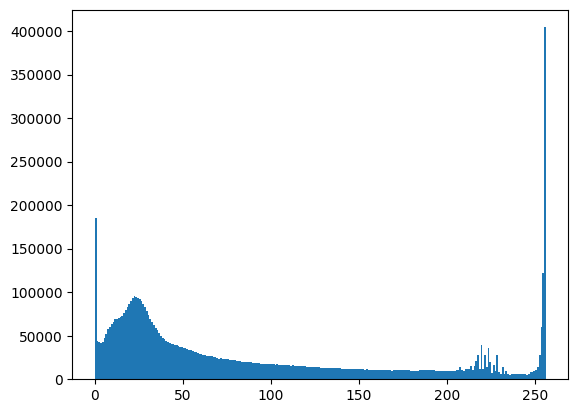

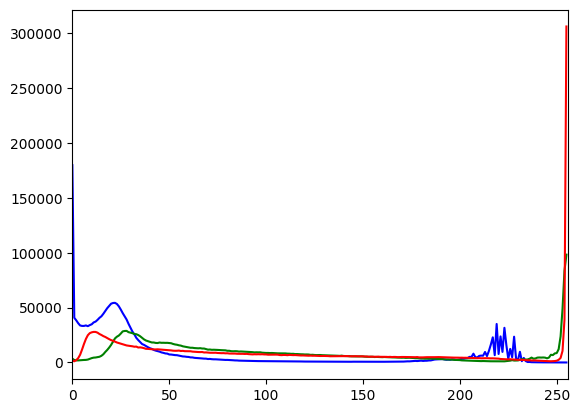

In [11]:
image = cv2.imread('images/tobago.jpg')
imshow("Input", image)

histogram = cv2.calcHist([image], [0], None, [256], [0, 256])

# We plot a histogram, ravel() flatens our image array 
plt.hist(image.ravel(), 256, [0, 256]); plt.show()

# Viewing Separate Color Channels
color = ('b', 'g', 'r')

# We now separate the colors and plot each in the Histogram
for i, col in enumerate(color):
    histogram2 = cv2.calcHist([image], [i], None, [256], [0, 256])
    plt.plot(histogram2, color = col)
    plt.xlim([0,256])
    
plt.show()

## **Algoritmo K-Means de agrupamento para ter as cores dominantes**

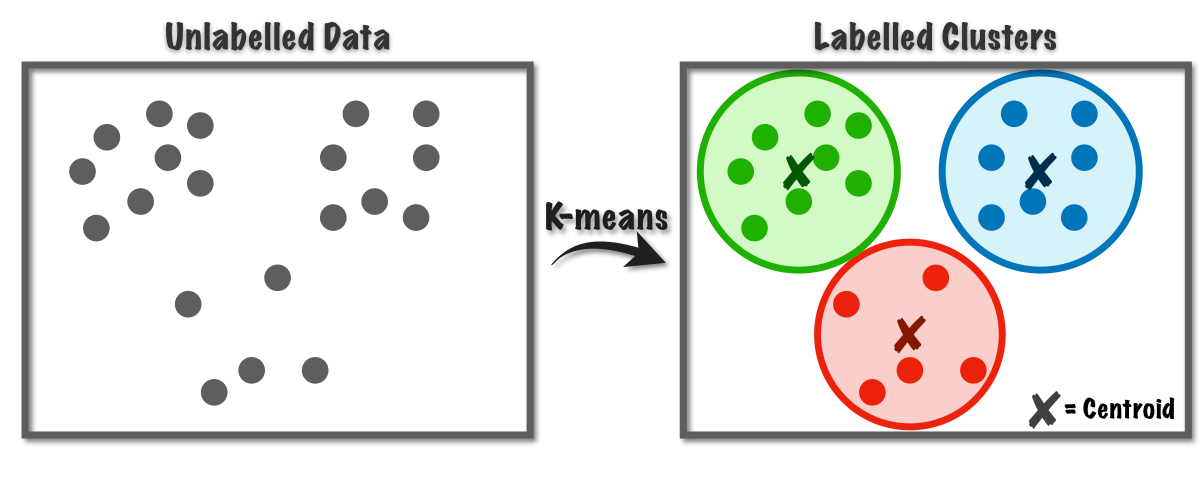

In [31]:
def centroidHistogram(clusters):
    # Crie um histrograma para os clusters com base nos pixels de cada cluster

    #O grupo para cada valor de pixel
    print(len(clusters.labels_)) #Numero de labels, igual o numero de pixels
    print(np.unique(clusters.labels_)) #os clusters, calculado em valores não repetidos
    print(len(np.unique(clusters.labels_))) #Total de clusters

    #Função np.arange (Retorna valores espaçados uniformemente dentro de um determinado intervalo.)
    # 0 a 6, para considerar o clusters 5, na contagem
    numLabels = np.arange(0, len(np.unique(clusters.labels_)) + 1)

    # Criando o histograma
    # Passando todos os pixels com seus grupos e dividindo o espaço, no numero de clusters
    (hist, _) = np.histogram(clusters.labels_, bins = numLabels)

    # normalize o histograma, de modo que ele some um.
    # Alguns valores de histograma pode vir como Int, que pode ocasionar 
    # truncamento ou arredondamento.
    hist = hist.astype("float")

    #Divide cada valor do histograma pela soma total dos valores no histograma.
    # Isso faz com que a soma de todos os valores no histograma seja igual a 1, 
    # convertendo-o em uma distribuição de probabilidade.
    hist /= hist.sum()

    return hist

def plotColors(hist, centroids):
    # Create our blank barchart
    bar = np.zeros((100, 500, 3), dtype = "uint8")

    x_start = 0
    # iterar sobre a porcentagem e a cor dominante de cada cluster
    for (percent, color) in zip(hist, centroids):
      print("Porcentagem deste cluster na imagem", percent)
      print("A cor sobre os 3 canais é: ",color)
      # traçar a porcentagem relativa de cada cluster
      # Para printar achando a porcentagem em cima da largura maxima da figura
      end = x_start + (percent * 500)
      cv2.rectangle(bar, (int(x_start), 0), (int(end), 100),
        color.astype("uint8").tolist(), -1)
      x_start = end # Ou seja, o inicio do proximo cluster na visualização, é o final do anterior
    return bar

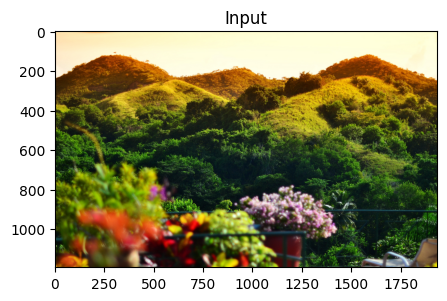

(1194, 1936, 3)
(2311584, 3)
2311584
2311584
[0 1 2 3 4]
5
Porcentagem deste cluster na imagem 0.34518321635726845
A cor sobre os 3 canais é:  [24.3657634  34.54820233 19.73523859]
Porcentagem deste cluster na imagem 0.17045757368107756
A cor sobre os 3 canais é:  [251.10275648 245.7174533  212.81642419]
Porcentagem deste cluster na imagem 0.15612714052355442
A cor sobre os 3 canais é:  [144.46716386 106.3663902   25.9268257 ]
Porcentagem deste cluster na imagem 0.10721392776554951
A cor sobre os 3 canais é:  [189.72088918 166.10947044  47.51962168]
Porcentagem deste cluster na imagem 0.22101814167255007
A cor sobre os 3 canais é:  [75.44056994 76.34426239 21.70727907]


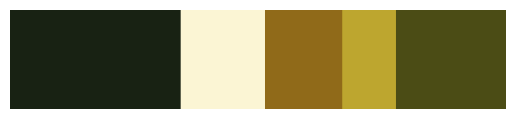

In [32]:
from sklearn.cluster import KMeans

image = cv2.imread('images/tobago.jpg')
imshow("Input", image)

# We reshape our image into a list of RGB pixels
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
print(image.shape)
image = image.reshape((image.shape[0] * image.shape[1], 3))
print(image.shape)
print(len(image))


#Configuração do K-Means
number_of_clusters = 5
clusters = KMeans(number_of_clusters)
clusters.fit(image)

hist = centroidHistogram(clusters)
bar = plotColors(hist, clusters.cluster_centers_)

# show our color bart
plt.figure()
plt.axis("off")
plt.imshow(bar)
plt.show()

### **Tente com sua imagem !**

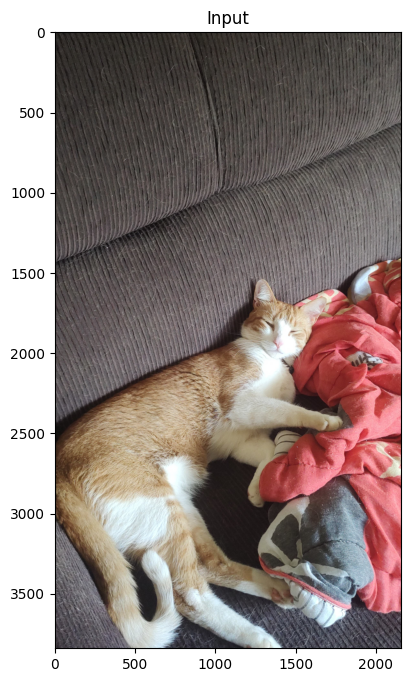

8294400
[0 1 2 3 4]
5
Porcentagem deste cluster na imagem 0.061608072916666666
A cor sobre os 3 canais é:  [160.43298392  59.49814464  58.53722463]
Porcentagem deste cluster na imagem 0.13580271026234567
A cor sobre os 3 canais é:  [212.75190274 199.60016512 194.72770941]
Porcentagem deste cluster na imagem 0.31509138695987654
A cor sobre os 3 canais é:  [100.19483885  91.92341701  88.97294285]
Porcentagem deste cluster na imagem 0.19909010898919752
A cor sobre os 3 canais é:  [161.98737366 138.39198112 128.0502264 ]
Porcentagem deste cluster na imagem 0.2884077208719136
A cor sobre os 3 canais é:  [56.52919499 49.00624353 46.88652777]


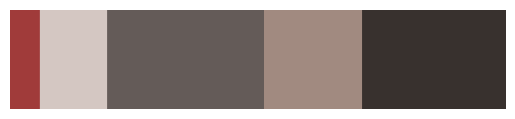

In [35]:
from sklearn.cluster import KMeans

image = cv2.imread('PatricioGatoNenudo.jpg')
imshow("Input", image)

# We reshape our image into a list of RGB pixels
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = image.reshape((image.shape[0] * image.shape[1], 3))

number_of_clusters = 5
clt = KMeans(number_of_clusters)
clt.fit(image)

hist = centroidHistogram(clt)
bar = plotColors(hist, clt.cluster_centers_)

# show our color bart
plt.figure()
plt.axis("off")
plt.imshow(bar)
plt.show()